In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

==================== Part 1: Basic Function ====================

In [3]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

======================= Part 2: Plotting =======================

In [4]:
data = pd.read_table('week2\\ex1data1.txt', sep=',', header=None, names=['Col1', 'Col2'], dtype={'Col1': np.float64, 'Col2': np.float64})

In [5]:
data.head()

,Col1,Col2
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
X = data.loc[:, 'Col1'].to_numpy()
X = X.reshape(X.size, 1)

In [7]:
y = data.loc[:, 'Col2'].to_numpy()
y = y.reshape(y.size, 1)

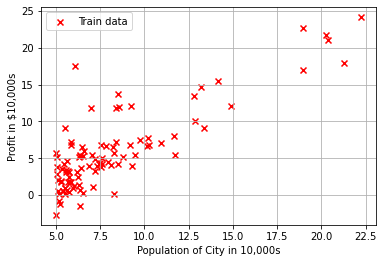

In [8]:
fig, ax = plt.subplots()

ax.scatter(X, y, c='red', marker='x', label='Train data')
ax.set_xlabel('Population of City in 10,000s', size=10)
ax.set_ylabel('Profit in $10,000s', size=10)
ax.grid(True)
ax.legend(fontsize=10)

plt.show()

=================== Part 3: Cost and Gradient descent ===================

In [9]:
X = np.hstack((np.ones((X.shape[0])).reshape(X.size, 1), X))

In [10]:
def compute_cost(X, y, theta):
    return (1 / ( 2 * y.shape[0])) * np.sum(np.power(np.matmul(X, theta) - y, 2))
    

In [11]:
J = compute_cost(X, y, np.zeros((2, 1), dtype=np.float64))

print('With theta = [0 ; 0]\nCost computed = {:.6f}\nExpected cost value (approx) 32.07\n'.format(J))

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07



In [12]:
J = compute_cost(X, y, np.array([[-1], [2]], dtype=np.float64))

print('With theta = [-1 ; 2]\nCost computed = {:.6f}\nExpected cost value (approx) 54.24\n'.format(J))

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24



In [13]:
iterations = 1500
alpha = 0.01
theta = np.zeros((2, 1), dtype=np.float64)

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_hist = np.zeros((num_iters, 1), dtype=np.float64)
    
    for idx in range(num_iters):
        theta = theta - alpha * (1 / y.shape[0]) * np.matmul(X.T, np.matmul(X, theta) - y)
        
        J_hist[idx] = compute_cost(X, y, theta)
        
    return theta, J_hist   

In [15]:
theta, J_hist = gradient_descent(X, y, theta, alpha, iterations)

In [16]:
print('Theta found by gradient descent:\n{}\n\nExpected theta values (approx)\n-3.6303\n1.1664\n'.format('\n'.join('{:.6f}'.format(item) for item in theta[:, 0])))

Theta found by gradient descent:
-3.630291
1.166362

Expected theta values (approx)
-3.6303
1.1664



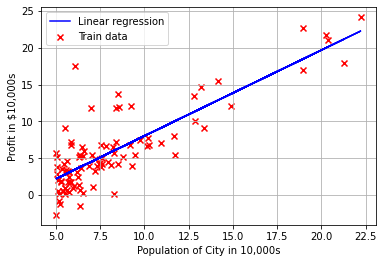

In [17]:
fig, ax = plt.subplots()

ax.scatter(X[:, 1], y, c='red', marker='x', label='Train data')
ax.plot(X[:, 1], np.matmul(X, theta), c='blue', label='Linear regression')
ax.set_xlabel('Population of City in 10,000s', size=10)
ax.set_ylabel('Profit in $10,000s', size=10)
ax.grid(True)
ax.legend(fontsize=10)

plt.show()

In [18]:
predict1 = np.matmul(np.array([[1, 3.5]], dtype=np.float64), theta)[0:,0][0]
predict2 = np.matmul(np.array([[1, 7]], dtype=np.float64), theta)[0:,0][0]

In [19]:
print('For population = 35,000, we predict a profit of {:.6f}'.format(predict1 * 10000))
print('For population = 70,000, we predict a profit of {:.6f}'.format(predict2 * 10000))

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


============= Part 4: Visualizing J(theta_0, theta_1) =============

In [20]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]), dtype=np.float64)

In [21]:
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        theta_ij = np.array([[theta0_vals[i]], [theta1_vals[j]]], dtype=np.float64)
        J_vals[i, j] = compute_cost(X, y, theta_ij)

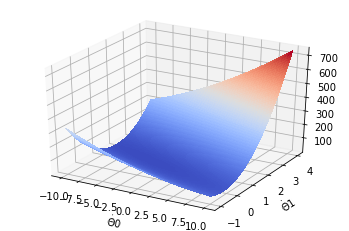

In [35]:
theta0_mg, theta1_mg = np.meshgrid(theta0_vals, theta1_vals)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ax.plot_surface(theta0_mg, theta1_mg, J_vals.T, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r"$\dot{\Theta}$0")
ax.set_ylabel(r"$\dot{\Theta}$1")

plt.show()

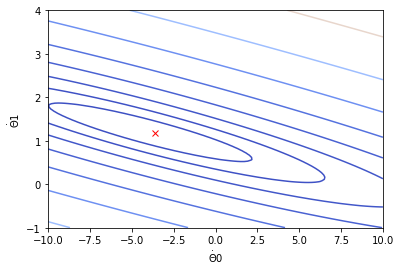

In [43]:
fig, ax = plt.subplots()

ax.contour(theta0_mg, theta1_mg, J_vals.T, np.logspace(-2, 3, 20), cmap=cm.coolwarm)
ax.plot(theta[0], theta[1], c='red', marker='x')
ax.set_xlabel(r"$\dot{\Theta}$0")
ax.set_ylabel(r"$\dot{\Theta}$1")

plt.show()